In [1]:
%pylab inline
import pynbody

Populating the interactive namespace from numpy and matplotlib


In [2]:
path='/mnt/is2/dpaz/ITV/S1373/out/'
s=pynbody.load(path+'snapshot_050')

In [3]:
gas = s.gas

In [4]:
xbox=403.8960 
ybox=459.8882
zbox=440.9021 
xc=408.205481 - xbox + 250 
yc=457.777839 - ybox + 250   
zc=441.538681 - zbox + 250

In [14]:
gas.loadable_keys()

['idgn',
 'iord',
 'mass',
 'pos',
 'idch',
 'u',
 'abvc',
 'sfr',
 'nh',
 'rho',
 'smooth',
 'vel',
 'ne']

In [5]:
pgs = gas['pos']
xne = gas['ne']
u   = gas['u']
rho = gas['rho']

In [6]:
r0 = 20
cut0, = np.where( (abs(pgs[:,0]-xc)<r0) & (abs(pgs[:,1]-yc)<r0) & (abs(pgs[:,2]-zc)<r0)   )

In [7]:
xh=0.76
yhe=(1.0-xh)/(4.0*xh)
mu = (1.0-yhe)/(1+yhe+xne)
mp=1.6726E-24
kcgs=1.3807E-16
vv=1e10
te=(5./3.-1.)*u*vv*mu*mp/kcgs

In [8]:
temp = np.log10(te[cut0])
dens = np.log10(rho[cut0])

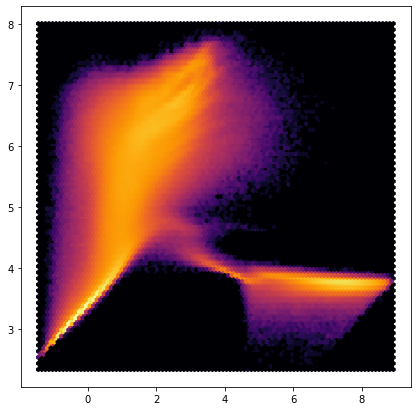

In [9]:
plt.figure(figsize=(7,7))
plt.hexbin(dens,temp,bins='log',cmap='inferno')

Ahora voy a seleccionar de ese diagrama de fases, diferentes regiones y voy a ver como cada region traza el perfil del void

In [9]:
temp1 = te[cut0]
rho1 = rho[cut0]
pgs1 = pgs[cut0]

In [10]:
limT=10**5
limRHO=116.
secc1, = np.where((temp1<limT) & (rho1<limRHO))
secc2, = np.where((temp1<limT) & (rho1>limRHO))
secc3, = np.where((temp1>limT) & (rho1<limRHO))
secc4, = np.where((temp1>limT) & (rho1>limRHO))

In [32]:
len(pgs1)

6353754

In [ ]:
bines=20
abin=np.log10(r0)/bines
p1=np.zeros(bines)
p2=np.zeros(bines)
p3=np.zeros(bines)
p4=np.zeros(bines)

dl=np.log10(r0)
for i in range(len(pgs1)):
    d = np.log10(np.sqrt((pgs1[i,0]-xc)**2+(pgs1[i,1]-yc)**2+(pgs1[i,2]-zc)**2))
    if ((temp1[i]<limT) & (rho1[i]<limRHO) & (d<np.log10(r0))):
        nbin=int(d/abin)
        p1[nbin]=p1[nbin]+1
    if((temp1[i]<limT) & (rho1[i]>limRHO)& (d<dl)):
        nbin=int(d/abin)
        p2[nbin]=p2[nbin]+1
    if ((temp1[i]>limT) & (rho1[i]<limRHO)& (d<dl)):
        nbin=int(d/abin)
        p3[nbin]=p3[nbin]+1
    if ((temp1[i]>limT) & (rho1[i]>limRHO)& (d<dl)):
        nbin=int(d/abin)
        p4[nbin]=p4[nbin]+1

In [ ]:
radio = np.zeros(bines)
vol   = np.zeros(bines) 
for i in range(bines):
    radio[i] = 10**(i*abin+abin/2)
    vol[i]   = (radio[i]**3)*4.*np.pi/3.

In [ ]:
print('difuso',np.sum(p1))
print('condensado',np.sum(p2))
print('WHIM',np.sum(p3))
print('hot',np.sum(p4))

Text(0.5, 0, 'radio')

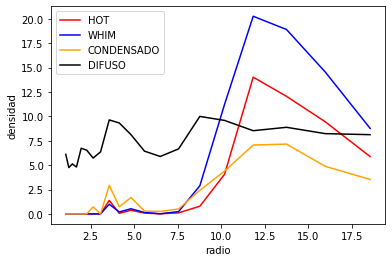

In [67]:
plt.plot(radio,p4/vol,color='red',label='HOT')
plt.plot(radio,p3/vol,color='blue',label='WHIM')
plt.plot(radio,p2/vol,color='orange',label='CONDENSADO')
plt.plot(radio,p1/vol,color='black',label='DIFUSO')
plt.legend()

plt.ylabel('densidad')
plt.xlabel('radio')

#plt.savefig(fname='/home/arodriguez/tesis/perfiles/fases_s.png',format='png')

In [114]:
800000**.5

894.4271909999159

In [8]:
t=np.loadtxt('/home/arodriguez/Void-s-Gastrophysics/perfiles/FasesGas/perfiles_FasesGAS.dat')
t2=np.loadtxt('/home/arodriguez/Void-s-Gastrophysics/perfiles/FasesGas/perfiles_FasesGAS_R.dat')

dgs=(3*(100**2)*(0.045))/(8*np.pi*(4.3e-9)*1e10)
dd=dgs*0.447
dc=dgs*0.143
dw=dgs*0.248
dh=dgs*0.168
masa_gs=0.018172996

Text(0.5, 0, 'radio [Mpc/h]')

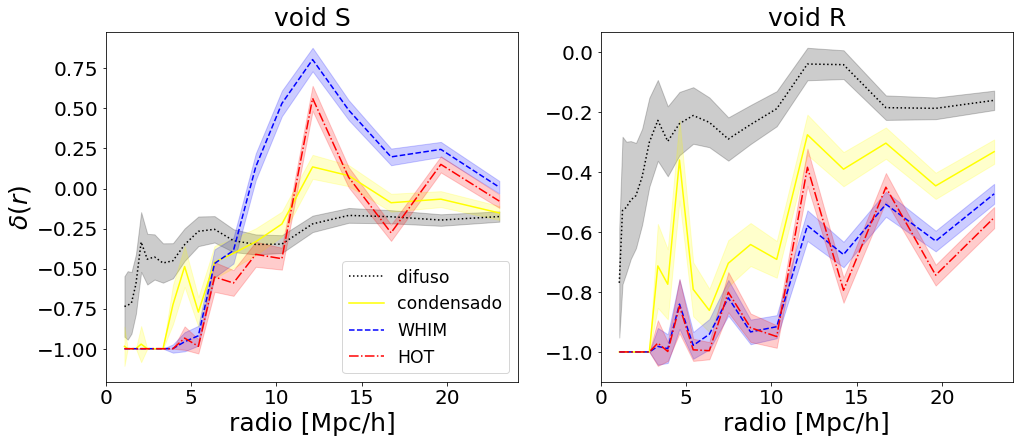

In [9]:
fig=plt.figure(figsize=(14,6))
fig.subplots_adjust(bottom=0.13, top=0.94, left=0.09, right=0.99)

plt.subplot(121)
plt.title('void S',size=25)
y1=t[:,1]*masa_gs/dd-1
dy1=t[:,5]*masa_gs/dd
plt.plot(t[:,0],y1,color='black',label='difuso',ls='dotted')
plt.fill_between(t[:,0], y1-np.sqrt(dy1), y1+np.sqrt(dy1),color='black', alpha=0.2)

y2=t[:,2]*masa_gs/dc-1
dy2=t[:,6]*masa_gs/dc
plt.plot(t[:,0],t[:,2]*masa_gs/dc-1,color='yellow',label='condensado')
plt.fill_between(t[:,0], y2-np.sqrt(dy2), y2+np.sqrt(dy2),color='yellow', alpha=0.2)

y3=t[:,3]*masa_gs/dw-1
dy3=t[:,7]*masa_gs/dw
plt.plot(t[:,0],t[:,3]*masa_gs/dw-1,color='blue',label='WHIM',ls='dashed')
plt.fill_between(t[:,0], y3-np.sqrt(dy3), y3+np.sqrt(dy3),color='blue', alpha=0.2)

y4=t[:,4]*masa_gs/dh-1
dy4=t[:,8]*masa_gs/dh
plt.plot(t[:,0],t[:,4]*masa_gs/dh-1,color='red',label='HOT',ls='dashdot')
plt.fill_between(t[:,0], y4-np.sqrt(dy4), y4+np.sqrt(dy4),color='red', alpha=0.2)
plt.xticks(size=20)
plt.yticks(size=20)
plt.legend(fontsize='xx-large')
plt.ylabel('$\\delta(r)$',size=25)
plt.xlabel('radio [Mpc/h]',size=25)
################################################################33

plt.subplot(122)
plt.title('void R',size=25)
y1=t2[:,1]*masa_gs/dd-1
dy1=t2[:,5]*masa_gs/dd
plt.plot(t2[:,0],y1,color='black',label='difuso',ls='dotted')
plt.fill_between(t2[:,0], y1-np.sqrt(dy1), y1+np.sqrt(dy1),color='black', alpha=0.2)

y2=t2[:,2]*masa_gs/dc-1
dy2=t2[:,6]*masa_gs/dc
plt.plot(t2[:,0],t2[:,2]*masa_gs/dc-1,color='yellow',label='condensado')
plt.fill_between(t2[:,0], y2-np.sqrt(dy2), y2+np.sqrt(dy2),color='yellow', alpha=0.2)

y3=t2[:,3]*masa_gs/dw-1
dy3=t2[:,7]*masa_gs/dw
plt.plot(t2[:,0],t2[:,3]*masa_gs/dw-1,color='blue',label='WHIM',ls='dashed')
plt.fill_between(t2[:,0], y3-np.sqrt(dy3), y3+np.sqrt(dy3),color='blue', alpha=0.2)

y4=t2[:,4]*masa_gs/dh-1
dy4=t2[:,8]*masa_gs/dh
plt.plot(t2[:,0],t2[:,4]*masa_gs/dh-1,color='red',label='HOT',ls='dashdot')
plt.fill_between(t2[:,0], y4-np.sqrt(dy4), y4+np.sqrt(dy4),color='red', alpha=0.2)
plt.xticks(size=20)
plt.yticks(size=20)
#plt.legend()
#plt.ylabel('$\\delta(r)$',size=25)
plt.xlabel('radio [Mpc/h]',size=25)

#plt.savefig(fname='/home/arodriguez/Void-s-Gastrophysics/SeleccionGraficos/perfilgas.pdf',format='pdf')

In [ ]:
t=np.loadtxt('/home/arodriguez/Void-s-Gastrophysics/perfiles/FasesGas/perfiles_FasesGAS.dat')
t2=np.loadtxt('/home/arodriguez/Void-s-Gastrophysics/perfiles/FasesGas/perfiles_FasesGAS_R.dat')
